In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)

%matplotlib inline


In [6]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifierRNNTrue",
    "TSClassifierRNNFalse",
    "TSClassifierRNNNone",
    "TSClassifierTransformerTrue",
    "TSClassifierTransformerFalse",
    "TSClassifierTransformerNone",
    # "RidgeClassifier",
    # "CanonicalIntervalForest",
    # "HIVECOTEV2",
    # "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "macro"},
)

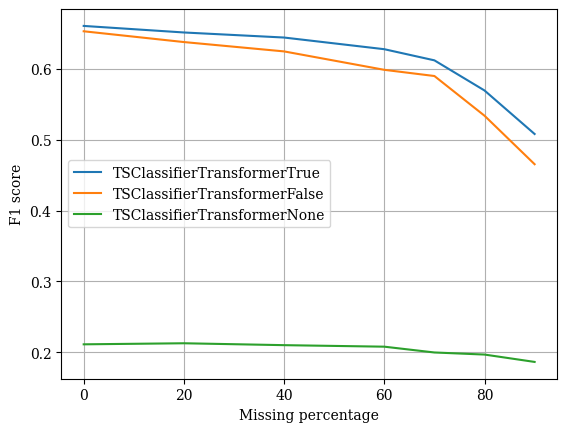

In [7]:
plot_metric(model_mean, metric="F1 score")

['TSClassifierRNNTrue' 'TSClassifierRNNFalse' 'TSClassifierRNNNone']
the null hypothesis over the entire classifiers cannot be rejected
TSClassifierRNNFalse    3.0
TSClassifierRNNNone     2.0
TSClassifierRNNTrue     5.0
dtype: float64
TSClassifierRNNNone     2.3
TSClassifierRNNFalse    2.0
TSClassifierRNNTrue     1.7
dtype: float64
('TSClassifierRNNNone', 'TSClassifierRNNTrue', 0.083984375, False)
('TSClassifierRNNFalse', 'TSClassifierRNNNone', 0.275390625, False)
('TSClassifierRNNFalse', 'TSClassifierRNNTrue', 0.275390625, False)
Index(['TSClassifierRNNNone', 'TSClassifierRNNFalse', 'TSClassifierRNNTrue'], dtype='object')
[0, 1, 2]


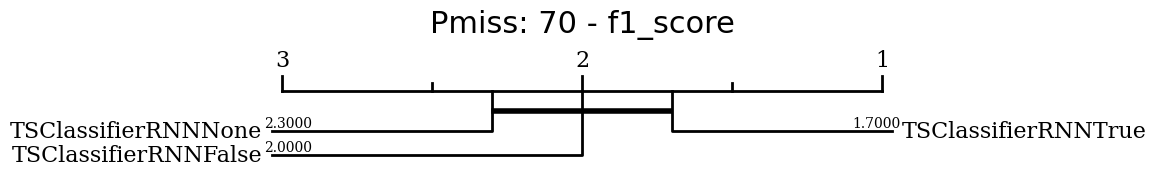

In [24]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 70
metric_name = "f1_score"

datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifierRNNTrue",
    "TSClassifierRNNFalse",
    "TSClassifierRNNNone",
    # "TSClassifierTransformerTrue",
    # "TSClassifierTransformerFalse",
    # "TSClassifierTransformerNone",
    # "TSClassifierTransformer",
    # "RidgeClassifier",
    # "CanonicalIntervalForest",
    # "HIVECOTEV2",
    # "ResNetClassifier",
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "macro"},
)
draw_cd_diagram(metric_name, df, title=f"Pmiss: {pmiss} - {metric_name}", labels=True)